In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [4]:
X : np.ndarray = clustering_df.to_numpy()
k_means_01 : models.KMeans = models.KMeans(X, 9)
k_means_01.fit_centroids(print_iterations=True, runs=20)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

K-MEANS: done at iteration  19
K-MEANS: done at iteration  9
K-MEANS: done at iteration  14
K-MEANS: done at iteration  22
K-MEANS: done at iteration  26
K-MEANS: done at iteration  18
K-MEANS: done at iteration  35
K-MEANS: done at iteration  14
K-MEANS: done at iteration  20
K-MEANS: done at iteration  34
K-MEANS: done at iteration  13
K-MEANS: done at iteration  19
K-MEANS: done at iteration  11
K-MEANS: done at iteration  13
K-MEANS: done at iteration  26
K-MEANS: done at iteration  53
K-MEANS: done at iteration  11
K-MEANS: done at iteration  44
K-MEANS: done at iteration  19
K-MEANS: done at iteration  18

CENTROIDES
Cluster = 01 | A: 153896, B: 238584
Cluster = 02 | A: 209972, B: 473514
Cluster = 03 | A: 568850, B: 787475
Cluster = 04 | A: 459693, B: 410515
Cluster = 05 | A: 738956, B: 493049
Cluster = 06 | A: 819010, B: 726787
Cluster = 07 | A: 349529, B: 683149
Cluster = 08 | A: 704875, B: 203435
Cluster = 09 | A: 410867, B: 179854


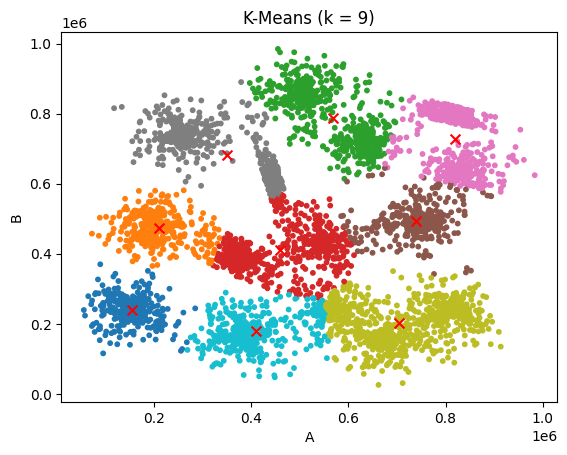

In [5]:
k_means_01.plot_clusters_2d()

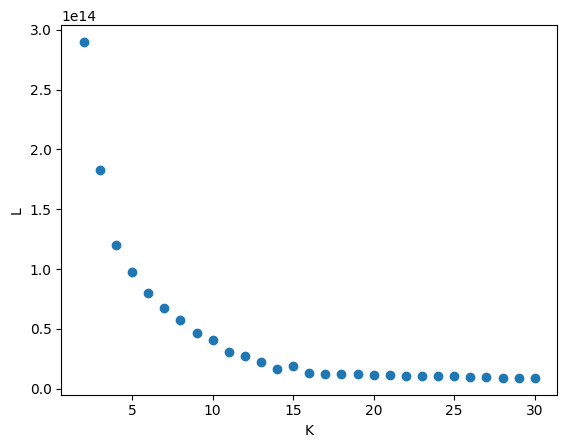

In [6]:
k_max : int = 30
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.show()

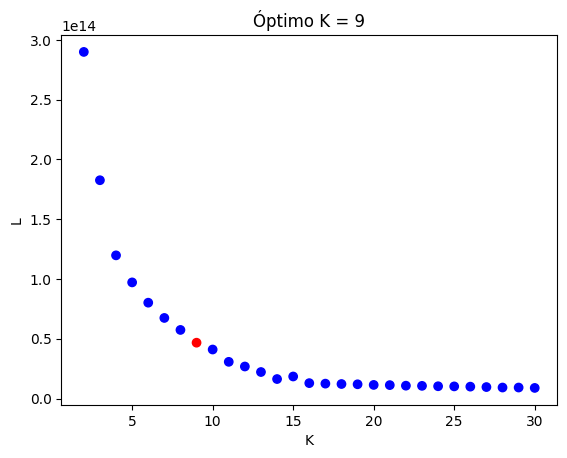

In [7]:
valores_k_np = np.array(valores_k)
losses_k_np = np.array(losses_k)

p1 = np.array([valores_k_np[0], losses_k_np[0]])
p2 = np.array([valores_k_np[-1], losses_k_np[-1]])
line_vec = p2 - p1
line_vec_norm = line_vec / np.linalg.norm(line_vec)

def distance_to_line(p):
    vec = p - p1
    proj = np.dot(vec, line_vec_norm) * line_vec_norm
    return np.linalg.norm(vec - proj)

distances = np.array([distance_to_line(np.array([valores_k_np[i], losses_k_np[i]])) for i in range(len(valores_k_np))])
k_opt = valores_k_np[np.argmax(distances)]

colors : list[float] = ['red' if k == k_opt else 'blue' for k in valores_k_np]

plt.scatter(valores_k_np, losses_k_np, c=colors)
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"Óptimo K = {k_opt}")
plt.show()


In [ ]:
X: np.ndarray = clustering_df.to_numpy()
gmm_model = models.GMM(X, 14)
gmm_model.fit_gaussians(use_k_means_centroids=True, max_iterations=10000, runs=20, print_iterations=True);
# print("\nCENTROIDES")
# for c, i in zip(mu, range(1, len(mu) + 1)):
#     print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

GMM: done at iteration 330
GMM: done at iteration 157
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 163
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 335
GMM: done at iteration 252
GMM: done at iteration 160
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 330
GMM: done at iteration 256
GMM: done at iteration 229


(array([[151951, 239262],
        [636709, 716631],
        [503630, 848987],
        [744106, 489515],
        [444249, 611258],
        [810815, 798127],
        [200371, 477923],
        [835529, 636669],
        [368642, 393519],
        [380817, 169456],
        [545202, 435678],
        [807546, 237009],
        [621716, 197684],
        [258524, 739618]]),
 array([[[ 1.26579799e+09, -1.15368101e+08],
         [-1.15368101e+08,  1.30702881e+09]],
 
        [[ 1.07164016e+09,  2.25190998e+08],
         [ 2.25190998e+08,  1.22460277e+09]],
 
        [[ 2.53688174e+09,  3.74083871e+08],
         [ 3.74083871e+08,  2.35861044e+09]],
 
        [[ 1.16813266e+09,  3.26053405e+07],
         [ 3.26053405e+07,  9.08293754e+08]],
 
        [[ 1.05968016e+08, -1.67464544e+08],
         [-1.67464544e+08,  9.33684494e+08]],
 
        [[ 8.35443133e+08, -2.19145687e+08],
         [-2.19145687e+08,  2.30903336e+08]],
 
        [[ 1.49597105e+09,  1.68408196e+08],
         [ 1.68408196e+08,  1.6

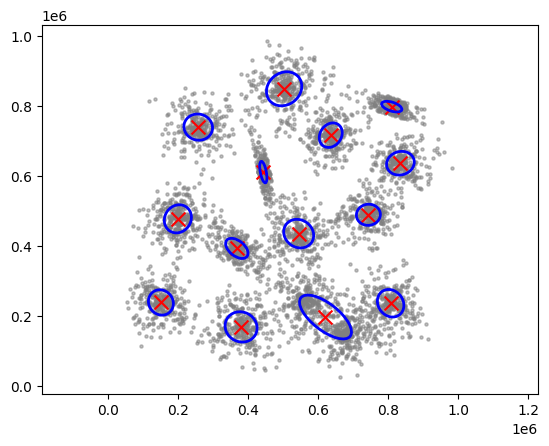

In [9]:
gmm_model.plot_gmm()